In [1]:
#IMPORTING SHIT
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


import scipy
import scipy.signal
from scipy import signal
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.signal import lfilter

from os.path import dirname, join as pjoin


import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

import wave

import colorednoise as cn
#from matplotlib import pylab as plt

import sounddevice as sd

from tqdm import tqdm
import time

import pathlib
from util.util import load_data_json, to_db
from expr.analysis import load_analysis

import hr.pam as pam
import hr.process as pierre

from scipy.optimize import curve_fit

%matplotlib widget

> ## Signal Synthesis

> Simple Noisless Signal with Two Sinusoids

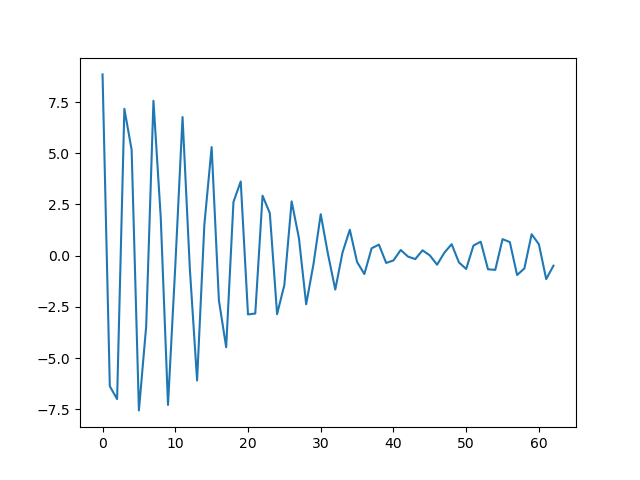

In [2]:
N_synth = 63

f0_synth = 1/4
f_synth = np.array([f0_synth, f0_synth+(1/N_synth)])

a_synth = np.array([1, 10])

delta_synth = np.array([0, -0.05])

phi_synth = np.array([1.5, 0.5])

# synthesised signal
x_synth = pam.synthesize(N_synth, delta_synth, f_synth, a_synth, phi_synth)

plt.plot(np.real(x_synth[0]))

#np.max(np.real(x_synth))

> Simple Noisless Signal with One Sinusoid and Vibrato Effect

In [3]:
N_vibr0 = 2**9-1

delta_vibr0 = np.array([0])

f_vibr0 = np.array([0.3])

a_vibr0 = np.array([2])

phi_vibr0 = np.array([0])

vibrato0 = pam.synthesize(N_vibr0, delta_vibr0, f_vibr0, a_vibr0, phi_vibr0, 0.02, 5, 0, 0)

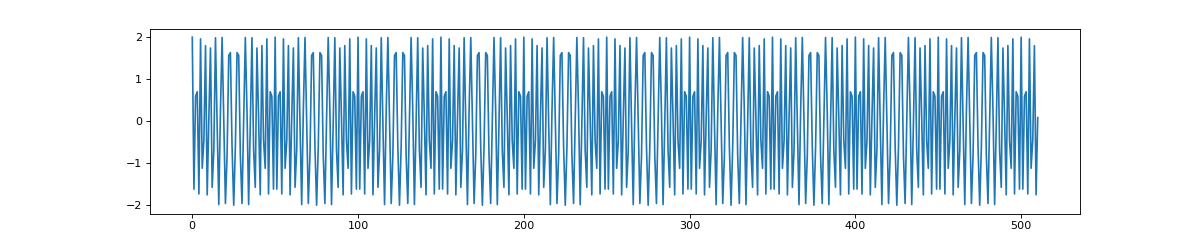

In [4]:
plt.figure(figsize=(15, 3), dpi=80)

plt.plot(np.real(vibrato0[0]))
plt.show()


In [5]:
fs_vibr0 = 1000

sd.play(np.real(vibrato0[0]), fs_vibr0)

print("The length of the signal is", N_vibr0/fs_vibr0, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr0, fs_vibr0)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato0[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr0, data.astype(np.int16))

The length of the signal is 0.511 seconds.


> Noisless Signal with Eight Sinusoids and vibrato Effect

In [6]:
N_vibr1 = 2**11-1

K_vibr1 = 8

f0_vibr1 = 0.06
f_vibr1 = f0_vibr1*np.arange(1,K_vibr1+1)

a_vibr1 = np.array([0.00807193, 0.09748246, 0.02404544, 0.04275309, 0.02482811,
       0.08778044, 0.00470351, 0.03118916])

delta_vibr1 = -0.0001*np.random.rand(K_vibr1)

phi_vibr1 = np.array([1.76348603, 1.20411769, 0.76158339, 1.35157899, 0.36247392,
       1.44086579, 1.73647764, 1.98131046])

vibrato1 = pam.synthesize(N_vibr1, delta_vibr1, f_vibr1, a_vibr1, phi_vibr1, 0.003, 10, 0, 0)

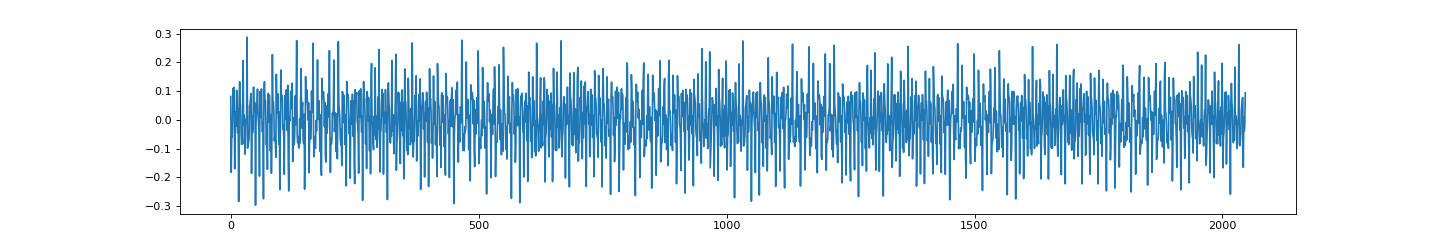

In [7]:
plt.figure(figsize=(18, 3), dpi=80)

plt.plot(np.real(vibrato1[0]))

plt.show()

In [8]:
fs_vibr1 = 1000

sd.play(np.real(vibrato1[0]), fs_vibr1)

print("The length of the signal is", N_vibr1/fs_vibr1, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr1, fs_vibr1)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato1[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr1, data.astype(np.int16))

The length of the signal is 2.047 seconds.


> Noisless Signal with Eight Sinusoids (Pink Noise and SNR = 39 dB)

SNR = 38.9160056896913 dB


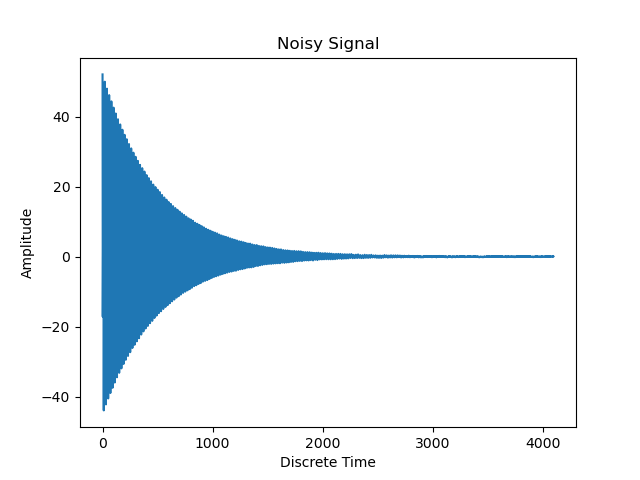

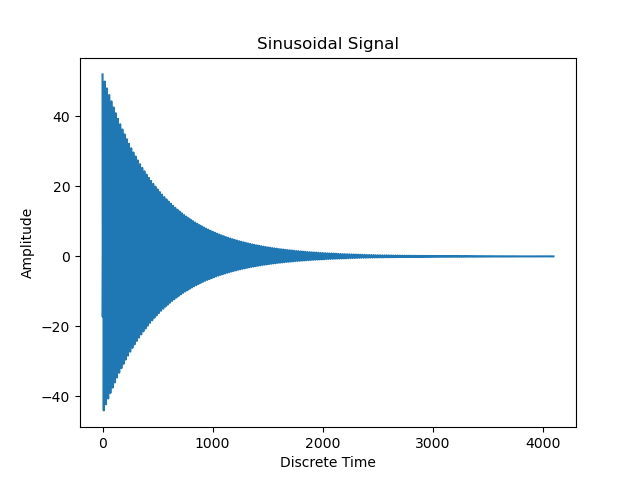

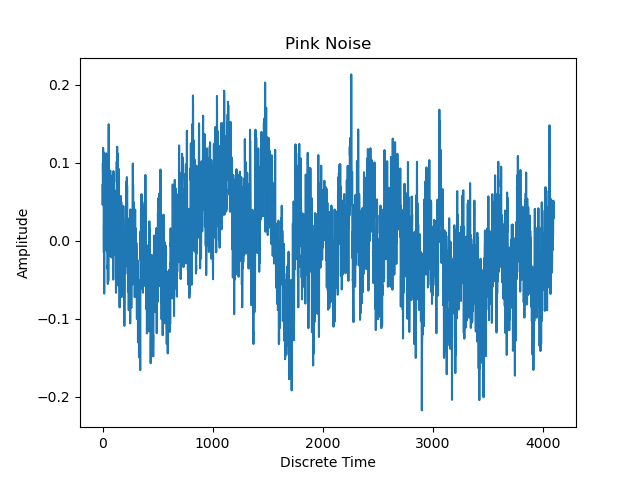

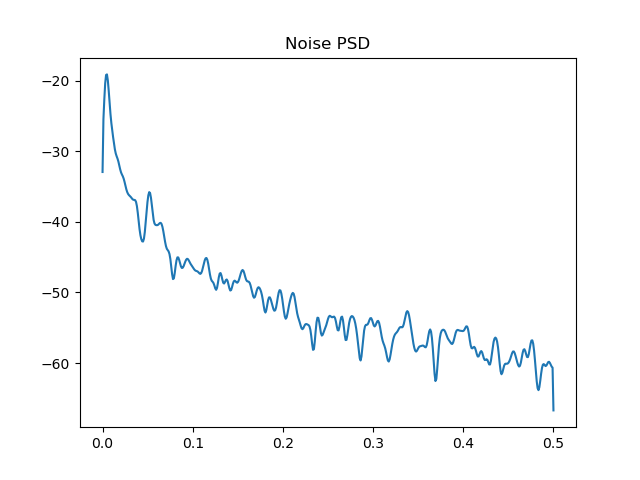

In [9]:
N_synth2 = 2**12-1

K_synth2 = 8

#f_synth2 = 0.48*np.random.rand(0,K_synth2) + 0.1*np.ones(K_synth2) 

#a_synth2 = 19*np.random.rand(0,K_synth2) + np.ones(K_synth2) 

f_synth2 = 0.05*np.arange(1,K_synth2+1)

a_synth2 = np.array([18, 15, 13, 11, 8, 5, 4, 3])

delta_synth2 = -0.002*np.ones([K_synth2])

phi_synth2 = np.array([0, 1.5, 0, 1, 0, 1.5, 0, 1])

# synthesised signal
x_synth2 = pam.synthesize(N_synth2, delta_synth2, f_synth2, a_synth2, phi_synth2, 0, 0, 2, 70)

print("SNR =", x_synth2[3], "dB")

plt.figure()
plt.plot(np.real(x_synth2[0]))
plt.title('Noisy Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(np.real(x_synth2[1]))
plt.title('Sinusoidal Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(x_synth2[2])
plt.title('Pink Noise')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
plt.show()


plt.figure()
plt.title("Noise PSD")
freq_synth2, PSD_noise_synth2 = signal.welch(x_synth2[2], nfft=1024)
plt.plot(freq_synth2, 20*np.log10(PSD_noise_synth2))
plt.show()


In [10]:
# play signal 
fs_synth2 = 1000

sd.play(np.real(x_synth2[0]), fs_synth2)

print("The length of the signal is", N_synth2/fs_synth2, "seconds.")

t = np.linspace(0., N_synth2/fs_synth2, fs_synth2)
amplitude = 0.01*np.iinfo(np.int16).max
data  = amplitude*np.real(x_synth2[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("noisy2.wav", fs_synth2, data.astype(np.int16))

The length of the signal is 4.095 seconds.


> ## Loading Experimental Data

C:\Users\royal\anaconda3\envs\env_pam_hr\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 512 is greater than input length  = 80, using nperseg = 80
  warnings.warn('nperseg = {0:d} is greater than input length '


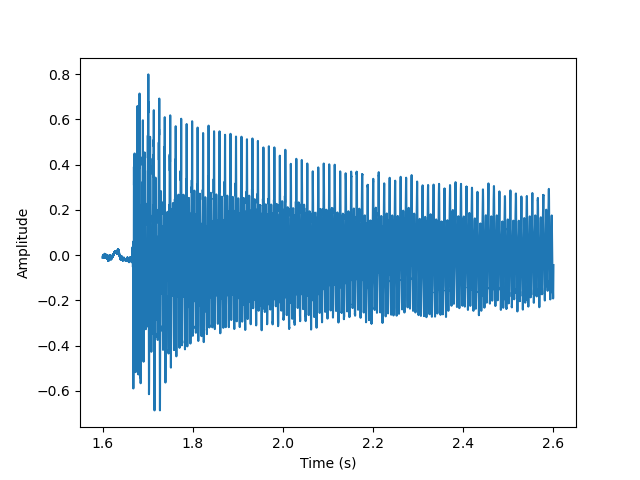

The length of the signal is 0.99998046875 seconds.


In [12]:
# Loading config from config files
conf_dir = pathlib.Path('./config/expr/')
data_dir = pathlib.Path('../data/expr/2022_01_27')
#
log_path = conf_dir / 'log_config.json'
conf_path = conf_dir / 'analysis_config.json'

# data_path = data_dir / 'MuteGuitar_HammerBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_5cm_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_5cmFromBridge_2.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_18cmFromBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_FifthFret_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_5cmFromBridge_1.mat'
data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_18cmFromBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_FifthFret_1.mat'
# data_path = data_dir / 'MuteGuitar_HammerBridge_1.mat'



log = load_data_json(log_path)
conf = load_data_json(conf_path)
expr_data = load_analysis(data_path, conf)

fs_mic = 51200
s0 = int(fs_mic*1.6)
s1 = int(fs_mic*2.6)

# see expr/util.py for details on what's inside expr_data
mic0 = expr_data["temporal"]["mic"]["whole"][s0:s1]
times = expr_data["times"]["whole"][s0:s1]

plt.figure()
#plt.title("Temporel Recorded Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
#plt.xlim(0.7, 1.5)
#plt.ylim(-10, 10)
plt.plot(times, mic0)
plt.show()

print("The length of the signal is", times[-1]-times[0], "seconds.")

#plt.savefig('temporel_acc.svg', facecolor="none", transparent=True, format="svg")

In [13]:
# play signal
#fs_mic = int(1/(times[1]-times[0]))

sd.play(mic0, fs_mic)


#t = np.linspace(0., N_vibr0/fs_mic, fs_mic)
#amplitude = np.iinfo(np.int16).max
#data  = 0.1*amplitude*np.real(mi0c)

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("mic.wav", fs_mic, data.astype(np.int16))

In [14]:
fs_mic

51200

(20000,)

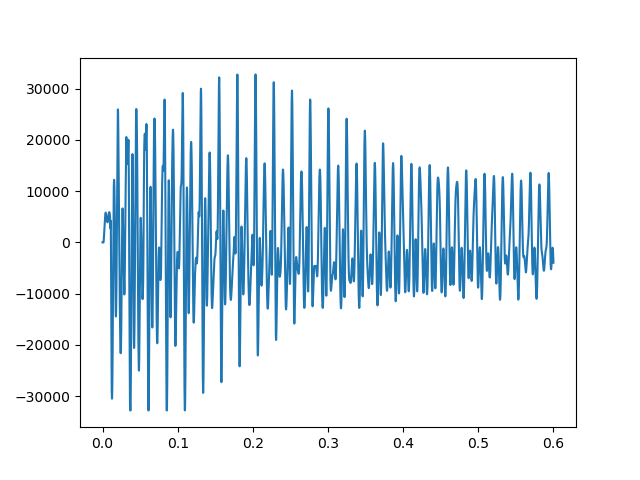

In [15]:
#uk_dir = 'C:\Users\royal\Desktop\HP\PAM\atiam_pam_hrparam\data\synth_uk\'
#file_name = pjoin(uk_dir, 'lowE_uk.wav')

file_name = r'C:\Users\royal\Desktop\HP\PAM\atiam_pam_hrparam\data\synth_uk\lowE_uk.wav'

fs_uk, synth_uk = read(file_name)

length_uk = synth_uk.shape[0] / fs_uk

times_uk = np.linspace(0., length_uk, synth_uk.shape[0])

plt.figure()

plt.plot(times_uk, synth_uk)

synth_uk.shape


In [16]:
# play signal

sd.play(synth_uk, fs_uk)


In [17]:
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')
Load the .wav file contents.

samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")
number of channels = 2
length = data.shape[0] / samplerate
print(f"length = {length}s")
length = 0.01s
Plot the waveform.

import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


SyntaxError: invalid syntax (3718490402.py, line 3)

> ## Signal Treatment

In [14]:
mic, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic0)

[]

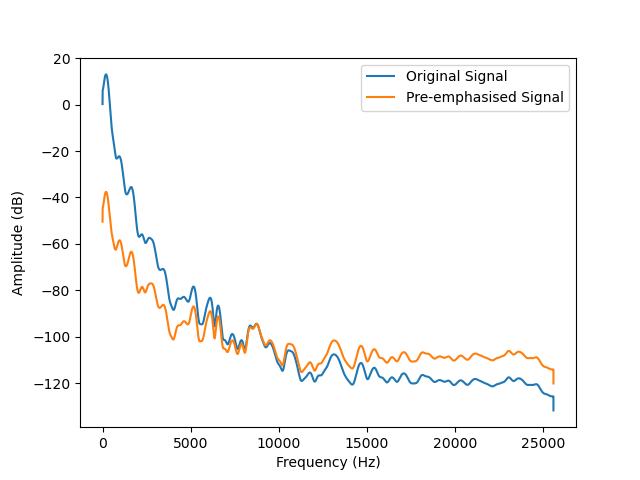

In [432]:
plt.figure()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.title('PSD before pre-emphasis')
plt.plot(freq_pre*fs_mic, 20*np.log10(PSD_mic), label="Original Signal")
plt.xlim()
#plt.savefig('PSD_beforepre_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.title('PSD after pre-emphasis')
plt.plot(freq_pre*fs_mic, 20*np.log10(PSD_mic_pre), label="Pre-emphasised Signal")
#plt.savefig('PSD_preemph_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.legend()
plt.plot()

> Constructing the Filter Bank

In [20]:
fs_mic
fs_uk

33333

10


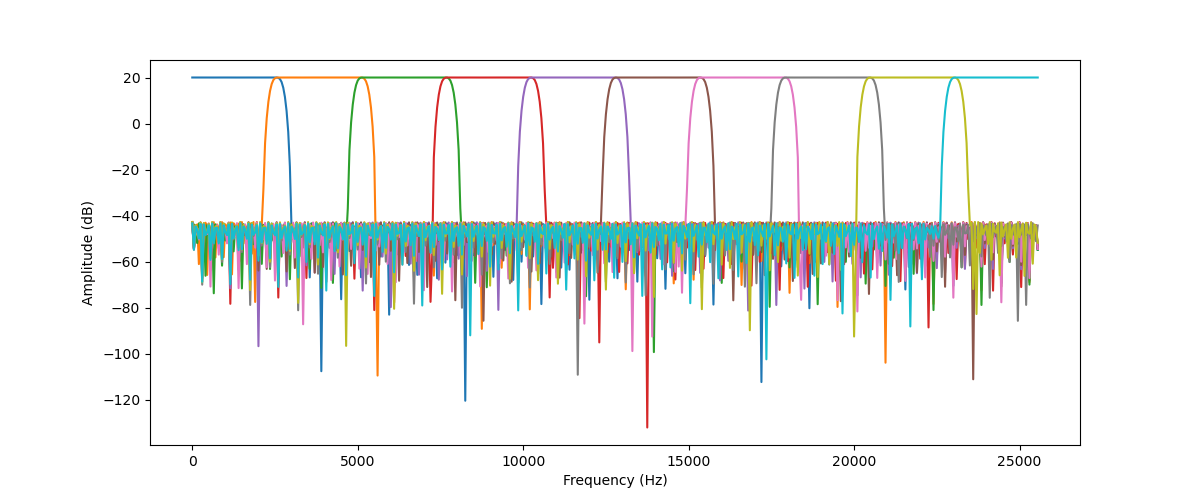

In [33]:
num_bands = 10

bank_coeffs = pam.filter_bank(num_bands, fs_mic, 425, 425)

print(len(bank_coeffs))

plt.figure(figsize=[12,5])

for i in range(len(bank_coeffs)):
    
    freqs, amps = signal.freqz(bank_coeffs[i], [1])
    plt.plot(0.5*fs_mic*freqs/np.pi, 20*np.log10(np.abs(amps)))
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')

#plt.savefig('filter_bank.svg', facecolor="none", transparent=True, format="svg")
plt.show()

In [19]:
bank_coeffs_uk = pam.filter_bank(6, fs_uk, 425, 425)

print(len(bank_coeffs_uk))

plt.figure(figsize=[10,5])

for i in range(len(bank_coeffs_uk)):
    
    freqs, amps = signal.freqz(bank_coeffs_uk[i], [1])
    plt.plot(0.5*fs_uk*freqs/np.pi, 20*np.log10(np.abs(amps)))
    

plt.show()

NameError: name 'fs_uk' is not defined

> Filtering Signal with the Filter Bank and Decimation

In [20]:

mic_bands = []

for i in range(num_bands):
    # band filtering
    filtered = signal.lfilter(bank_coeffs[i], [1], mic)
    # frequency shifting
    N = filtered.shape[0]
    time = np.arange(0, N, dtype=complex)
    freq0 = 0.5*(i/num_bands)
    shifted = filtered*np.exp(2*np.pi*1j*freq0*time)
    # decimating
    decimated = pam.decimate(shifted, num_bands)
    decimated = np.real(decimated)
    mic_bands.append(decimated)
    

In [21]:
mic_bands[0].shape

(5120,)

In [22]:
# Filtering UK
num_bands_uk = len(bank_coeffs_uk)
uk_bands = []

for i in range(num_bands_uk):
    filtered = signal.lfilter(bank_coeffs_uk[i], [1], synth_uk)
    decimated = pam.decimate(filtered, num_bands_uk)
    uk_bands.append(decimated)

fs_bands_uk = fs_uk//num_bands_uk

NameError: name 'bank_coeffs_uk' is not defined

> PSD of Signal by Sub-bands

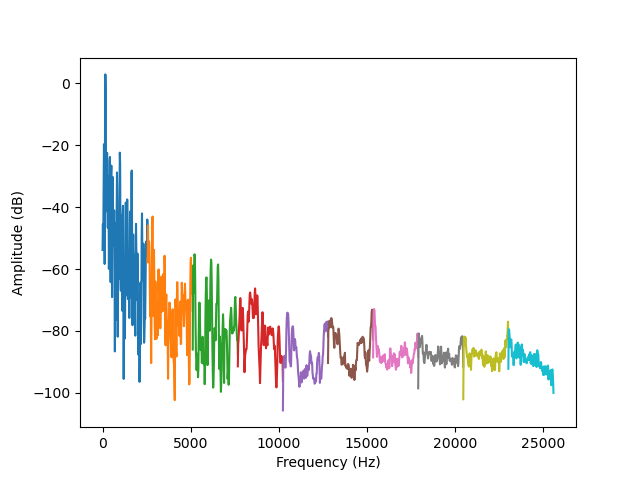

In [34]:
fs_bands = fs_mic//num_bands
plt.figure()
for i in range(num_bands):
    
    freqs, PSD = signal.welch(mic_bands[i])
    plt.plot(fs_bands*freqs+i*fs_bands/2, 20*np.log10(PSD))
    #plt.title('PSD by Sub-bands')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')

    #plt.savefig('PSD_bands.svg', facecolor="none", transparent=True, format="svg")

    #freqso, amps = signal.freqz(bank_coeffs[i], [1])
    #plt.plot(0.5*fs_mic*freqso/np.pi, 20*np.log10(np.abs(amps)))
plt.show()

#for i in range(num_bands):    
#    fft = np.fft.fft(mic_bands[i])
#    freqs = np.fft.fftfreq(mic_bands[i].size)
#    plt.figure()
#    plt.plot(freqs*fs_bands, np.abs(fft))
#    plt.show()

In [36]:
# play one sub-band
sd.play(mic_bands[0], fs_bands)

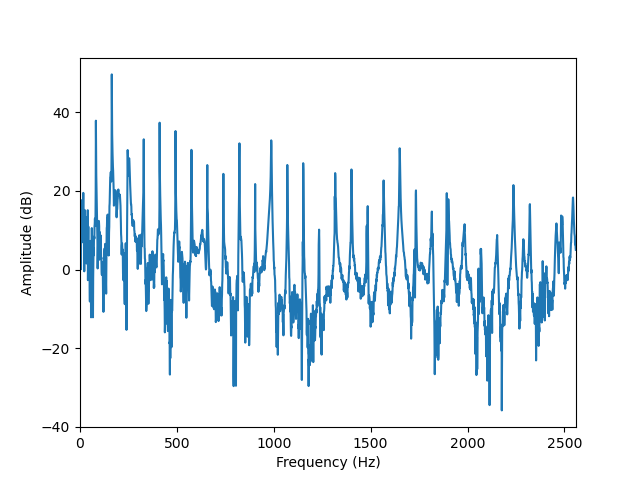

In [41]:
fft = np.fft.fft(mic_bands[0])
freqs = np.fft.fftfreq(mic_bands[0].size)
plt.figure()
plt.plot(np.fft.fftshift(freqs)*fs_bands, 20*np.log10(np.fft.fftshift(np.abs(fft))))
plt.xlim(0, 2560)
#plt.ylim(10, 10**4)
#plt.title('Periodogram')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()

plt.savefig('fft_acc_lowband.svg', facecolor="none", transparent=True, format="svg")

> #### Noise Whitening

> Testing with Synthetic Signal

In [42]:
x_white2, freq2_norm, PSD_x2, PSD_noise2, PSD_x_white2, PSD_noise_white2 = pam.whiten(np.real(x_synth2[0]), 200, 4, 15)

print('The minimum value for the smoothing order is', 4*0.016*len(freq2_norm))

freq2 = fs_synth2*freq2_norm

plt.figure()
plt.title('Before Whitening')
plt.plot(freq2, 20*np.log10((PSD_x2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

plt.figure()
plt.title('After Whitening')
plt.plot(freq2, 20*np.log10((PSD_x_white2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise_white2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()


plt.figure()
plt.title("Noise PSD")
plt.plot(fs_synth2*freq_synth2, 20*np.log10(PSD_noise_synth2), label = 'Noise PSD')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

[0.00302756 0.00188294 0.00102829 ... 0.00069072 0.00102829 0.00188294]


ValueError: too many values to unpack (expected 6)

> Whitening the Experimental Signal (before filter bank)

In [43]:
'''
mic_white, freq_mic, PSD_mic, PSD_noise_mic, PSD_mic_white, PSD_noise_mic_white = pam.whiten(mic, 100, 4, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_mic))

freq_mic *= fs_mic

plt.figure()
plt.title('Original Signal - Before Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,500)
plt.legend()
plt.show()

plt.figure()
plt.title('Original Signal - After Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic_white)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
plt.show()
'''

"\nmic_white, freq_mic, PSD_mic, PSD_noise_mic, PSD_mic_white, PSD_noise_mic_white = pam.whiten(mic, 100, 4, 15)\n\nprint('The smoothing order must be at least', 4*0.016*len(freq_mic))\n\nfreq_mic *= fs_mic\n\nplt.figure()\nplt.title('Original Signal - Before Whitening')\nplt.plot(freq_mic, 20*np.log10((PSD_mic)), label = 'PSD of signal')\nplt.plot(freq_mic, 20*np.log10((PSD_noise_mic)), label = 'Noise PSD Estimation')\nplt.xlabel('Frequency (Hz)')\nplt.ylabel('Amplitude (dB)')\n#plt.xlim(0,500)\nplt.legend()\nplt.show()\n\nplt.figure()\nplt.title('Original Signal - After Whitening')\nplt.plot(freq_mic, 20*np.log10((PSD_mic_white)), label = 'PSD of signal')\nplt.plot(freq_mic, 20*np.log10((PSD_noise_mic_white)), label = 'Noise PSD Estimation')\nplt.xlabel('Frequency (Hz)')\nplt.ylabel('Amplitude (dB)')\n#plt.xlim(0,1000)\nplt.legend()\nplt.show()\n"

> Whitening the First Band

[0.00049796 0.00033286 0.00021996 ... 0.0001385  0.00021996 0.00033286]
The smoothing order must be at least 262.208


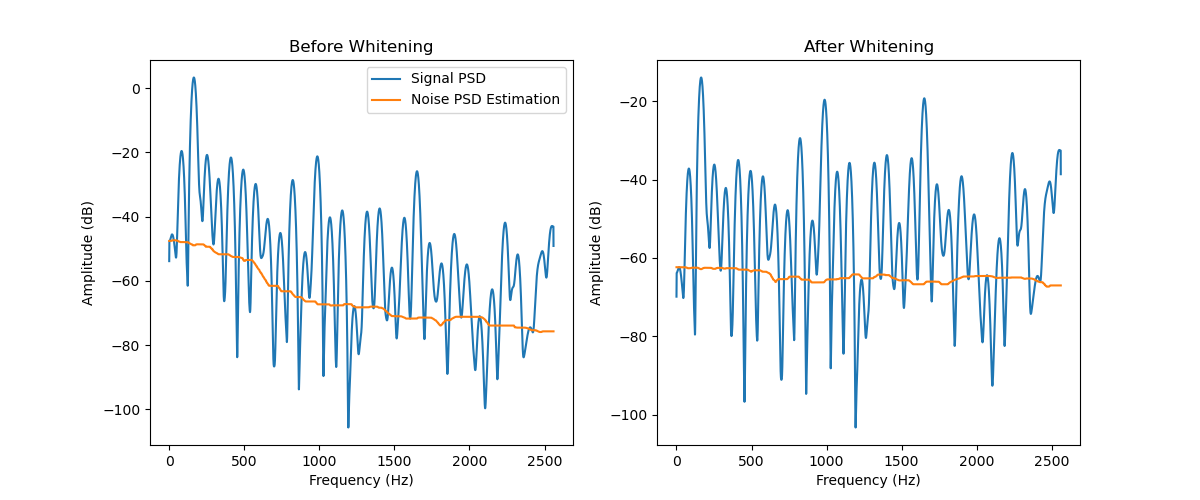

In [439]:
band0_white, freq_band0, PSD_band0, PSD_noise_band0, PSD_band0_white, PSD_noise_band0_white, AR_band0_white = pam.whiten(mic_bands[0], 2000, 4, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_band0))

freq_band0 *= fs_bands

plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)

plt.title('Before Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0)), label = 'Signal PSD')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
#plt.savefig('1stband_c_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")


plt.subplot(1, 2, 2)
plt.title('After Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0_white)), label = 'Signal PSD')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
#plt.legend()
plt.savefig('whiten_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

> ## HR Analysis

> Testing EPRIT and LeastSquares

In [67]:
delta_an, f_an = pam.esprit(x_synth[0], 32, 2)

alpha_an, a_an, phi_an = pam.least_squares(x_synth[0], delta_an, f_an)

#EdB_an = Energy(x_synth, delta_an, a_an)

print(delta_an, f_an, alpha_an, a_an, phi_an)#, EdB_an)


[-5.00000000e-02 -1.11022302e-16] [0.26587302 0.25      ] [8.77582562+4.79425539j 0.0707372 +0.99749499j] [10.  1.] [0.5 1.5]


> Testing ESPRIT by Blocks (with a vibrato)

In [68]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato0[0][:200], 0.035, 0.020, fs_vibr0, 32, 1)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr0, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

- Damping factors:
 [[-0.06462156]
 [-0.1059914 ]
 [-0.07731631]
 [-0.04093937]
 [-0.03264625]
 [-0.06462156]
 [-0.1059914 ]
 [-0.07731631]] 
- Frequencies:
 [[263.86192528]
 [295.01165819]
 [340.46558463]
 [251.49205179]
 [348.0143032 ]
 [263.86192528]
 [295.01165819]
 [340.46558463]] 
- Complex Amplitudes:
 [[ 0.48384274+0.86758021j]
 [-0.77708497+0.96585895j]
 [-0.39036651+0.70820166j]
 [ 0.70678423-1.15950977j]
 [ 0.6792423 +0.05645188j]
 [ 0.48384274+0.86758021j]
 [-0.77708497+0.96585895j]
 [-0.39036651+0.70820166j]] 
- Amplitudes:
 [[0.99337768]
 [1.23965502]
 [0.80866285]
 [1.35794214]
 [0.68158413]
 [0.99337768]
 [1.23965502]
 [0.80866285]] 
- Intial Phases:
 [[ 1.06206657]
 [ 2.24830748]
 [ 2.0745666 ]
 [-1.02338117]
 [ 0.08291951]
 [ 1.06206657]
 [ 2.24830748]
 [ 2.0745666 ]]


In [69]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato1[0][:200], 0.035, 0.020, fs_vibr1, 32, 8)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr1, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

- Damping factors:
 [[-2.43174877e-02 -3.93538554e-03  3.83801876e-04 -6.58402723e-02
  -8.14316184e-01 -2.31961714e+00 -1.45322054e+00 -6.02197464e-01]
 [ 1.34968254e-02 -3.41606907e-02 -1.08824251e-02 -1.99617112e-02
  -1.19976947e+00 -1.10330650e+00 -2.53803474e+00 -7.93230936e-01]
 [ 4.19346685e-03 -6.72964831e-02 -2.53664692e-02 -1.85353819e-02
  -1.22929074e+00 -1.06310223e+00 -1.01351644e+00 -9.00169147e-01]
 [-6.53101172e-03 -7.94857609e-02 -3.31048394e-02 -3.88214925e-02
  -7.46242317e-01 -1.52740594e+00 -1.62839648e+00 -7.77118937e-01]
 [-1.04727867e-02 -1.41327965e-02 -2.29372465e-02 -8.45858840e-02
  -8.00347960e-01 -9.63756427e-01 -9.48429234e-01 -7.10940903e-01]
 [-3.36918763e-02 -1.13213058e-02  4.84708987e-03 -6.61458657e-02
  -1.20632269e+00 -7.31680137e-01 -8.23243987e-01 -1.47009257e+00]
 [ 6.55482181e-03 -2.70900612e-02 -7.44054146e-03 -1.64835760e-02
  -5.86902280e-01 -8.23805182e-01 -4.88491320e+00 -1.84609531e+00]
 [ 1.51026371e-03 -5.76786022e-02 -2.11185512e-02

> HR Analysis for Experimental Signal

In [70]:
delta_mic, f_mic, alpha_mic, a_mic, phi_mic = pam.esprit_blocks(mic_white, 0.030, 0.020, fs_mic, 32, 30)

print( 'Frequencies:\n', f_mic*fs_mic, '\n\n- Damping factors:\n', delta_mic, '\n\n- Complex Amplitudes:\n', alpha_mic, '\n\n- Amplitudes:\n', a_mic, '\n\n- Intial Phases:\n', phi_mic )

NameError: name 'mic_white' is not defined

In [71]:
# ESPRIT FOR synth_uk
window_length = 0.5
hop_size = 0.05

delta_uk, freq_uk, alpha_uk, amp_uk, phi_uk = pam.esprit_blocks(uk_bands[0], window_length, hop_size, fs_bands_uk, 64, 62)

freq_uk_hz = freq_uk*fs_bands_uk

print(freq_uk_hz.shape)

print( 'Frequencies:\n', freq_uk_hz) #, '\n\n- Damping factors:\n', delta_band0, '\n\n- Complex Amplitudes:\n', alpha_band0, '\n\n- Amplitudes:\n', amp_band0, '\n\n- Intial Phases:\n', phi_band0 )

NameError: name 'uk_bands' is not defined

In [72]:
window_length*fs_mic

25600.0

In [73]:


#band0_white_n = int(2*window_length*fs_mic/5)



In [95]:
band0_white_n = 68

band0_white_order_pmax = band0_white_n//2

band0_white_order = pierre.Ester.estimate_esm_ordre(band0_white, band0_white_n, band0_white_order_pmax)

band0_white_order

6

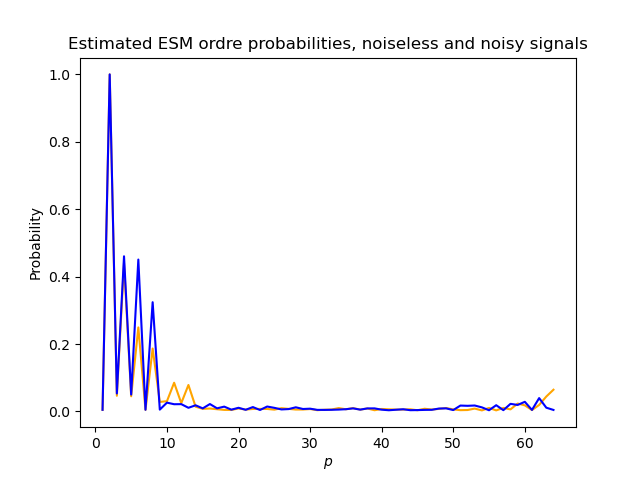

Ordre of the ESM model
 Noisy=8, Whitened=8


In [212]:
ps = np.arange(1,band0_white_order_pmax+1)
#j_sine = Ester.inverse_error_func(x_sine, n=n_est, p_max=p_max)
j_noise = pierre.Ester.inverse_error_func(mic_bands[0], n=band0_white_n, p_max=band0_white_order_pmax)
j_white = pierre.Ester.inverse_error_func(band0_white, n=band0_white_n, p_max=band0_white_order_pmax)

plt.figure()
plt.title('Estimated ESM ordre probabilities, noiseless and noisy signals')
plt.xlabel('$p$')
plt.ylabel('Probability')
#plt.plot(ps, j_sine/np.max(j_sine), c='cyan')
plt.plot(ps, j_noise/np.max(j_noise), c='orange')
plt.plot(ps, j_white/np.max(j_white), c='b')
plt.show()

#r_est_sine = Ester.estimate_esm_ordre(x_sine, n_est, p_max)
r_est_noise = pierre.Ester.estimate_esm_ordre(mic_bands[0], n=band0_white_n, p_max=band0_white_order_pmax)
r_est_white = pierre.Ester.estimate_esm_ordre(band0_white, n=band0_white_n, p_max=band0_white_order_pmax)
print('Ordre of the ESM model')
print(f' Noisy={r_est_noise}, Whitened={r_est_white}')

In [349]:
window_length = 0.5
hop_size = 0.05

delta_band0, freq_band0, alpha_band0, amp_band0, phi_band0 = pam.esprit_blocks(band0_white, window_length, hop_size, fs_bands, 68, 2*32)

freq_band0_hz = freq_band0*fs_bands
print(freq_band0_hz.shape)

print( 'Frequencies:\n', freq_band0_hz) #, '\n\n- Damping factors:\n', delta_band0, '\n\n- Complex Amplitudes:\n', alpha_band0, '\n\n- Amplitudes:\n', amp_band0, '\n\n- Intial Phases:\n', phi_band0 )

(10, 64)
Frequencies:
 [[ 2541.46051849 -2541.46051849  2471.83201296 -2471.83201296
   2238.17167043 -2238.17167043  2316.40524192 -2316.40524192
   2396.63272539 -2396.63272539  2156.38167217 -2156.38167217
   1980.06188995 -1980.06188995  1899.93166184 -1899.93166184
   1813.35869658 -1813.35869658  1735.05854237 -1735.05854237
   1650.59845182 -1650.59845182  1699.35237446 -1699.35237446
   1566.57461218 -1566.57461218  1484.34386862 -1484.34386862
   1401.79051409 -1401.79051409  1319.03952448 -1319.03952448
   1152.21556131 -1152.21556131  1069.24096418 -1069.24096418
    986.46127134  -986.46127134   165.04458051  -165.04458051
     74.19842657   -74.19842657    95.06083767   -95.06083767
    250.02346228  -250.02346228   324.54776732  -324.54776732
    410.39215047  -410.39215047   493.4542928   -493.4542928
    578.58780987  -578.58780987   651.96809375  -651.96809375
    741.41844286  -741.41844286   823.23482177  -823.23482177
    916.37030651  -916.37030651  1017.56916785 -

frequencies
 [  19.19272058   82.20471146  164.16471291  245.5928585   328.85808723
  411.09923809  493.18351673  575.49430216  657.10760958  739.97136373
  822.64610494  904.29427601  987.34784937 1070.20168436 1152.38543418
 1234.22095444 1317.16965487 1401.41691349 1484.04093061 1566.26191227
 1650.21355688 1733.50276431 1816.9536669  1894.13299837 1964.93765507
 2029.50278063 2060.28367624 2236.70118452 2321.36810403 2398.49802225
 2480.40663415 2535.03009327]
amplitudes
 [0.0005585  0.00792376 0.02813561 0.00616838 0.0069457  0.0088795
 0.00797311 0.00574433 0.00434528 0.00520352 0.01355192 0.00333148
 0.02138357 0.00828282 0.01022443 0.00232042 0.00693674 0.01224077
 0.00274874 0.00570555 0.020653   0.00659392 0.00485564 0.00192136
 0.00057937 0.00029653 0.00081203 0.00687564 0.00508475 0.00035018
 0.00111698 0.00328328]
damping factors
 [-2.44662646e-04 -1.37773540e-04 -1.03440993e-04 -7.86929052e-04
 -4.03518530e-04 -1.60701461e-04 -2.30433397e-04  8.06084677e-06
 -2.47096562e-

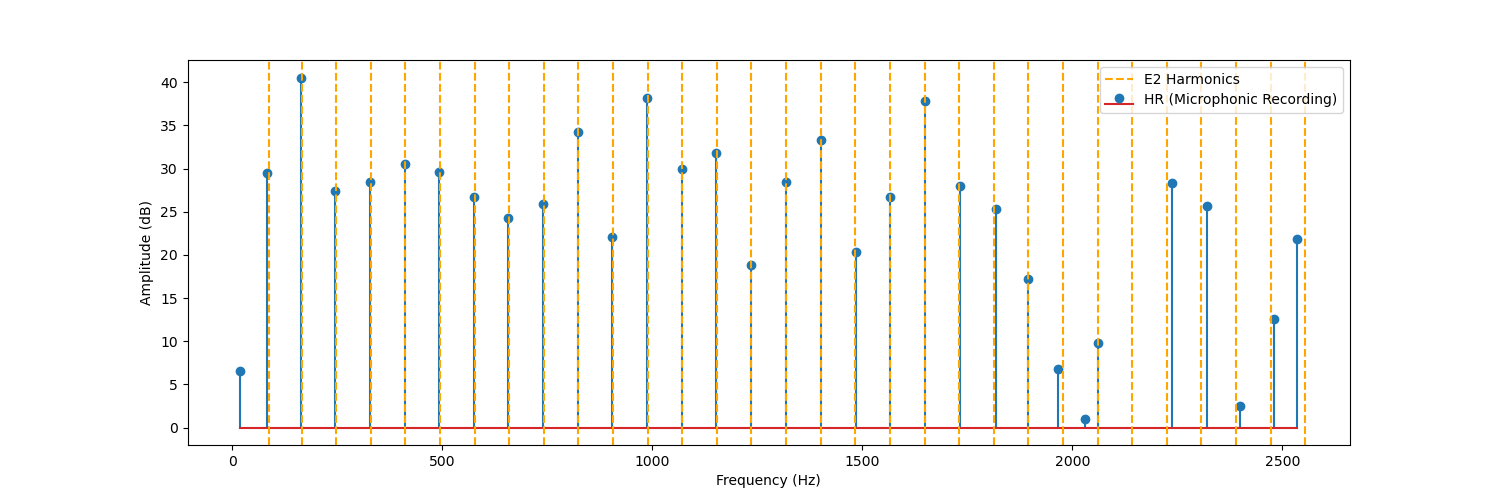

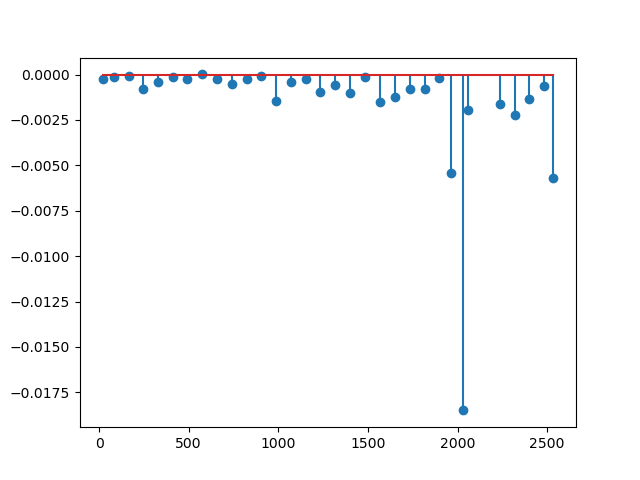

In [350]:
block = 5

graph = np.array([freq_band0_hz[block], amp_band0[block], delta_band0[block], phi_band0[block]]) #alpha_band0[block]

graph = graph[:, graph[0, :].argsort()]

start = freq_band0_hz.shape[1]//2 


freqs_alex = graph[0][start:] #freq
nus_alex = freqs_alex/fs_bands
amps_log = np.abs(np.min(20*np.log10(graph[1][start:]))) + 20*np.log10(graph[1][start:]) + 1 #amp log

amps_alex = graph[1][start:]
damping_alex = graph[2][start:] #damping
phases_alex = graph[3][start:]
#complex_alex = graph[4][start:]

#graph_uk = np.array([freq_uk_hz[block], amp_uk[block]])

#graph_uk = graph_uk[:, graph_uk[0, :].argsort()]

#start_uk = freq_uk_hz.shape[1]//2 - 1

#x_uk = graph_uk[0][start_uk:]
#y_uk = np.abs(np.min(20*np.log10(graph_uk[1][start_uk:]))) + 20*np.log10(graph_uk[1][start_uk:]) + 1
#y_uk = 0.4*y_uk

print('frequencies\n', freqs_alex)
print('amplitudes\n', amps_alex)
print('damping factors\n', damping_alex)
print('initial phases\n', phases_alex)
#print('complex amplitudes\n', complex_alex)

#print(x_uk)

plt.figure(figsize = [15,5])

#plt.title('Frequencies detected by ESPRIT for a block of ' + str(window_length*1000) + ' ms\n(' + str(block*hop_size*1000) + ' ms after attack).')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')


plt.stem(freqs_alex, amps_log, label='HR (Microphonic Recording)')


#plt.setp(markerline, markersize = 5)

#plt.stem(x_uk[:-3], y_uk[:-3], 'g', markerfmt='Dg',  label='HR (UK synthesis)')


plt.axvline(88.4, 0, 1, color='orange', linestyle='dashed', label='E2 Harmonics')
for i in range(2,32):
    plt.axvline(i*82.4, 0, 1, color='orange', linestyle='dashed')

plt.legend(loc = 'upper right')

#plt.savefig('2000_025_05_68_32_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

plt.figure()
plt.stem(freqs_alex, damping_alex, label='HR Analysis')
plt.show()

In [351]:
nus_alex

array([0.00374858, 0.01605561, 0.03206342, 0.04796736, 0.0642301 ,
       0.08029282, 0.09632491, 0.11240123, 0.12834133, 0.14452566,
       0.16067307, 0.17661998, 0.19284138, 0.20902377, 0.22507528,
       0.24105878, 0.2572597 , 0.27371424, 0.28985174, 0.30591053,
       0.32230734, 0.33857476, 0.35487376, 0.36994785, 0.38377689,
       0.39638726, 0.40239916, 0.4368557 , 0.45339221, 0.46845664,
       0.48445442, 0.49512307])

In [352]:
AR_band0_white = np.flip(AR_band0_white)

zeds = np.exp(2*np.pi*1j*nus_alex)

dewhite_coeffs = np.polyval(AR_band0_white, zeds**(-1))
amps_alex_dewhite = amps_alex/np.abs(dewhite_coeffs)

np.abs(dewhite_coeffs)


array([0.36781313, 0.36304819, 0.37067648, 0.40992391, 0.44929576,
       0.46285994, 0.48968722, 0.58395579, 0.72301841, 0.85455851,
       0.954489  , 1.03294344, 1.09881154, 1.13814313, 1.14530166,
       1.14467366, 1.17254824, 1.23892976, 1.32026796, 1.39872028,
       1.46485429, 1.49776151, 1.48136816, 1.43689221, 1.41141042,
       1.4303694 , 1.45469977, 1.6471833 , 1.71203245, 1.76151612,
       1.80605042, 1.82225448])

In [353]:
print(amps_alex)
print(amps_alex_dewhite)

[0.0005585  0.00792376 0.02813561 0.00616838 0.0069457  0.0088795
 0.00797311 0.00574433 0.00434528 0.00520352 0.01355192 0.00333148
 0.02138357 0.00828282 0.01022443 0.00232042 0.00693674 0.01224077
 0.00274874 0.00570555 0.020653   0.00659392 0.00485564 0.00192136
 0.00057937 0.00029653 0.00081203 0.00687564 0.00508475 0.00035018
 0.00111698 0.00328328]
[0.00151842 0.02182563 0.07590342 0.01504762 0.01545907 0.019184
 0.01628205 0.00983693 0.00600992 0.00608913 0.01419808 0.00322523
 0.01946064 0.00727748 0.00892728 0.00202715 0.00591596 0.00988011
 0.00208196 0.00407912 0.01409901 0.00440252 0.00327781 0.00133716
 0.00041049 0.00020731 0.00055821 0.00417418 0.00297001 0.0001988
 0.00061847 0.00180177]


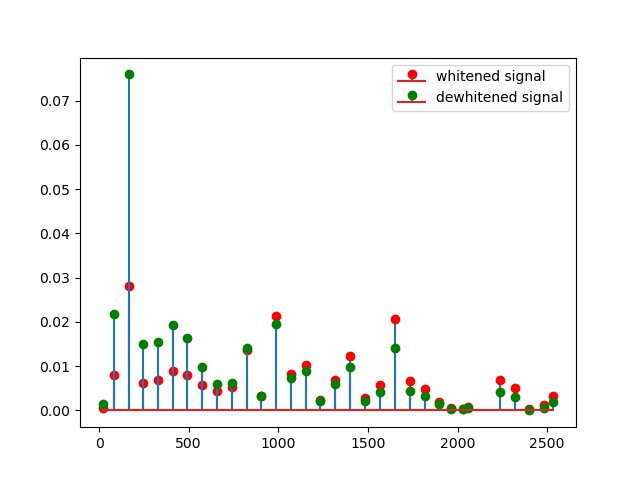

In [354]:
plt.figure()
plt.stem(freqs_alex, amps_alex, markerfmt='ro', label='whitened signal')
plt.stem(freqs_alex, amps_alex_dewhite, markerfmt='go', label='dewhitened signal')
plt.legend()
plt.show()

In [355]:
damp_acc = np.array([-0.01270824, -0.00470592, -0.00454763, -0.00187058, -0.00478688, -0.00282691, -0.00382689, -0.0108937, -0.00989453])
modal_mass = np.array([2.91, 0.45, 0.25, 2.65, 9.88, 0.41, 0.38, 1.07, 2.33])

In [356]:
c_n = -2*modal_mass*damp_acc*fs_bands
c_n

array([378.68521882,  21.68487936,  11.6419328 ,  50.76005888,
       484.29439386,  11.86849894,  14.89119437, 119.36009216,
       236.07557018])

In [400]:
freqs_study = freqs_alex[1:24]
n_x = np.arange(len(freqs_study)) + 1
freqs_y = freqs_study / (n_x)
freqs_study

array([  82.20471146,  164.16471291,  245.5928585 ,  328.85808723,
        411.09923809,  493.18351673,  575.49430216,  657.10760958,
        739.97136373,  822.64610494,  904.29427601,  987.34784937,
       1070.20168436, 1152.38543418, 1234.22095444, 1317.16965487,
       1401.41691349, 1484.04093061, 1566.26191227, 1650.21355688,
       1733.50276431, 1816.9536669 , 1894.13299837])

In [405]:
def fit_func(n, a2):
    # Curve fitting function
    return a2 * n**2 + freqs_study[0]  # a1=0, a0=1

In [406]:
params = curve_fit(fit_func, n_x, freqs_y)
[a2] = params[0]
n_fit = np.linspace(n_x[0], n_x[-1], 100)
y_fit = a2 * n_fit**2 + freqs_study[0]


a_2 = 0.00060564218


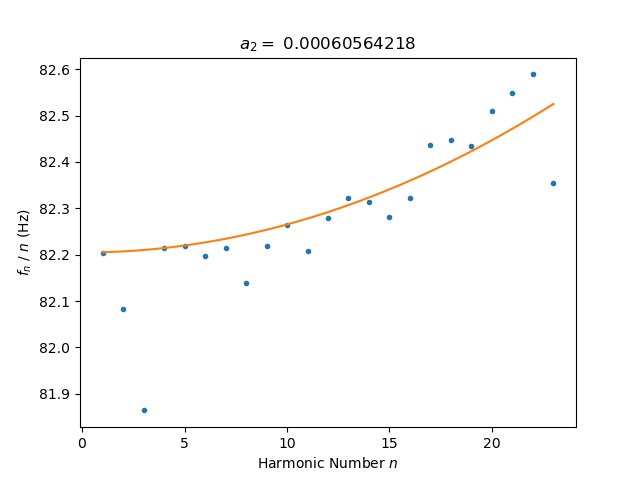

In [421]:
print('a_2 = ' + str(round(a2, 11)))
plt.figure()

plt.plot(n_x, freqs_y, '.')         # Data
plt.plot(n_fit, y_fit)  # Fitted curve
plt.title('$a_2 =$ ' + str(round(a2, 11)))
plt.xlabel("Harmonic Number $n$")
plt.ylabel("$f_n$ / $n$ (Hz)")

#plt.savefig('quad2000_025_05_68_32_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

In [409]:
freqs_lin = freqs_alex[1:12]
n_lin = np.arange(len(freqs_lin)) + 1
freqs_lin_y = freqs_lin / n_lin

In [410]:
L = 0.61

def fit_lin(n, c):
    # Curve fitting function
    return c/(2*L)

In [411]:
params1 = curve_fit(fit_lin, n_lin, freqs_lin_y)
[c] = params1[0]
n_fit1 = np.linspace(n_lin[0], n_lin[-1], 100)
y_fit1 = 0 * n_fit1 + c/(2*L)


c = 100.24264 m/s
rho = 0.00659kg/m
T = 66.25unit


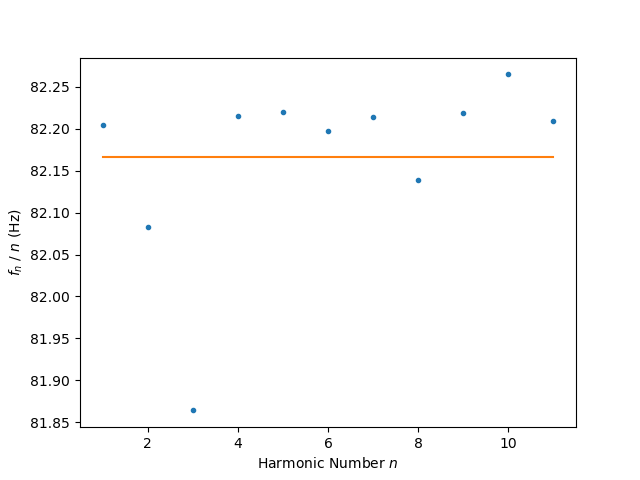

In [418]:
print('c = ' + str(round(c, 5)) + ' m/s')
rho = 6*10**(-3) / 0.91
print('rho = ' + str(round(rho, 5)) + 'kg/m')
tension = rho*c**2
print('T = ' + str(round(tension, 2)) + 'unit')

plt.figure()

plt.plot(n_lin, freqs_lin_y, '.')
plt.plot(n_fit1, y_fit1)  # Fitted curve
#plt.title('$c =$ ' + str(round(c, 1)) + ' m/s')

plt.xlabel("Harmonic Number $n$")
plt.ylabel("$f_n$ / $n$ (Hz)")

#plt.savefig('lin2000_025_05_68_32_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

In [429]:
B = 2*tension*(L**2)*a2 / (c*np.pi**2*82.2)
B

3.671948574271146e-07

In [212]:
fs_bands

5120

In [54]:
# pre-emphasize
mic_pre, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic)
   
colored_list = []
white_list = []
freq_list = []
PSD_c_list = []
PSD_noise_c_list = []
PSD_w_list = []
PSD_noise_w_list = []
ESTER_orders = []
delta_list = []
freq_list = []
alpha_list = []
amp_list = []
phi_list = []
synth_list = []
synth_up_list = []

chunk_length = 256
total_length = chunk_length*num_bands*11
synth_final = np.zeros(total_length)

for i in range(num_bands):

    # apply filter bank
    filtered = signal.lfilter(bank_coeffs[i], [1], mic_pre)
    # decimate
    decimated = pam.decimate(filtered, num_bands)
    colored_list.append(decimated)
    # whiten
    band_white, freq_band, PSD_band, PSD_noise_band, PSD_band_white, PSD_noise_band_white = pam.whiten(decimated, 1200, 4, 15)
    white_list.append(band_white)
    freq_list.append(freq_band)
    PSD_c_list.append(PSD_band)
    PSD_noise_c_list.append(PSD_noise_band)
    PSD_w_list.append(PSD_band_white)
    PSD_noise_w_list.append(PSD_noise_band_white)
    # ESTER
    n = 68
    p_max = n//2
    r = pierre.Ester.estimate_esm_ordre(band_white, n, p_max)
    ESTER_orders.append(r)
    # ESPRIT
    window_length = 0.05
    hop_size = 0.05
    delta_band, freq_band, alpha_band, amp_band, phi_band = pam.esprit_blocks(band_white, window_length, hop_size, fs_bands, n, 2*r)
    delta_list.append(delta_band)
    freq_list.append(freq_band)
    alpha_list.append(alpha_band)
    amp_list.append(amp_band)
    phi_list.append(phi_band)
    # synthesize
    synth_band = np.array([])
    for j in range(len(delta_band)):
        chunk, _, _, _ = pam.synthesize(chunk_length, delta_band[j], freq_band[j], amp_band[j], phi_band[j])
        synth_band = np.concatenate((synth_band, np.real(chunk)))
    synth_list.append(synth_band)
    # resample
    synth_band_up = signal.resample(synth_band, num_bands*len(synth_band))
    synth_up_list.append(synth_band_up)
    # add bands
    synth_band_up = np.array(synth_band_up)
    if i < 9:
        synth_final += synth_band_up

In [172]:
print(ESTER_orders)

[33, 2, 7, 7, 19, 3, 1, 1, 4, 1]


In [167]:
synth_band_up.shape

(28160,)

In [168]:
256*11

2816

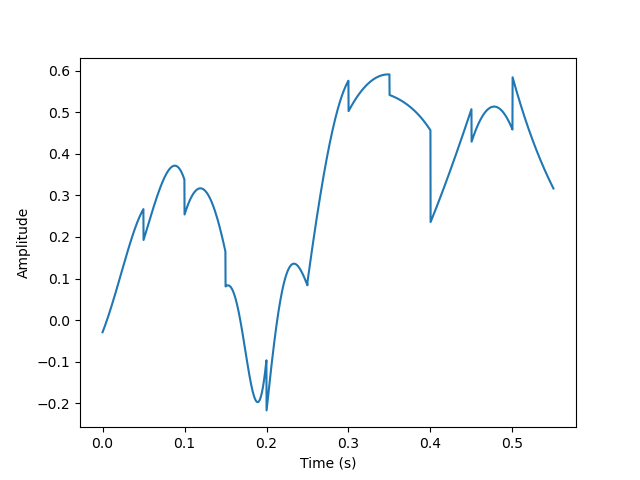

In [238]:
i = 9

length_sec = len(synth_list[i]) / fs_bands
times_synth = np.linspace(0., length_sec, len(synth_list[i]))

plt.figure()
plt.plot(times_synth, synth_list[i])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sd.play(synth_list[i], fs_bands)

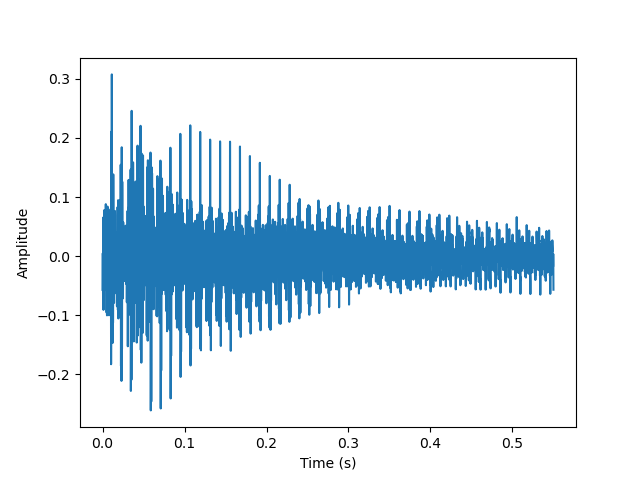

In [236]:
times_final = np.linspace(0., length_sec, len(synth_final))

plt.figure()
plt.plot(times_final, synth_final)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sd.play(synth_final, fs_mic)

In [234]:
sd.play(mic, fs_mic)

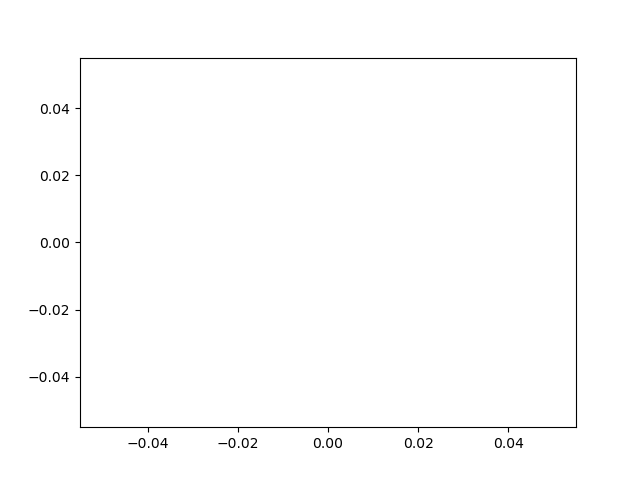

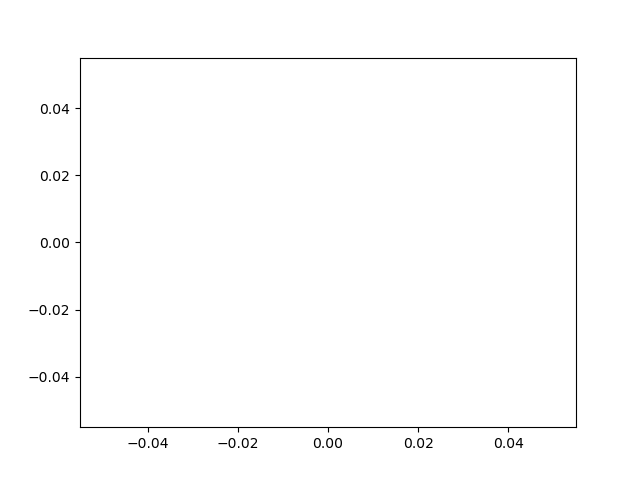

In [473]:
mic_pre, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic[35000:70000])

plt.figure()
plt.plot(freq_pre, 20*np.log10((PSD_mic)), label = 'PSD of signal')
plt.show()

plt.figure()
plt.plot(freq_pre, 20*np.log10((PSD_mic_pre)), label = 'PSD of signal')
plt.show()

In [475]:
def Adaptive(x : np.ndarray, n : int, r : float, fe : float, beta: float):
    # n : number of lines in W
    # r : estimation by ESTER of the order
    # # n>r
    # fe: sampling frequency
    #  0 < β < 1 is the forgetting factor

    # computation of W(0), Z(0)
    W0 = np.zeros(n, r)
    W0[:r, :] = np.identity(r)
    W0[r:, :] = 0
    Z0 = np.identity(r)
    
    # time step
    NbEch = len(x)
    t = (np.arange(0, NbEch)/fe)
    W = []
    W.append(W0)
    # W = np.zeros((1, t))
    # W[0] = W0
    

    Z = []
    Z.append(Z0)
    #Z = np.zeros((1, t))
    #Z[0] = Z0

    psi = []
    Phi = []    # the list of Φ(t) 
    eigenvalues = []

    #e = np.zeros((1, t))   #e(t) , not sure about the dimension
    phi = np.zeros((1, t)) #Θ(t) , not sure about the dimension
    #e_point = np.zeros((1, t)) #e'(t) , not sure about the dimension

    #matrix dimensions : y(t), h(t), g(t)
    #y = np.zeros((n, r))
    #h = np.zeros((r, r))
    #g = np.zeros((2, r))
  
    for i in t:  #from 0 to t-1
        # PAST main section
        y = W[i].conj().T @ x[i+1]
        h = Z[i] @ y
        g = h / (beta + y.conj().T @ h)

        # API main section
        e = x[i+1] - W[i]@y #e(t)
        phi = (np.identity(r) + np.linalg.norm(e)**2 @ g @g.conj().T)**(-1/2)
        Z[i+1] = 1/beta * phi.conj().T @ (np.identity(r) - g @ y.conj().T)@Z[i] @ np.linalg.inv(phi.conj().T)
        W[i+1] = (W[i] + e[i+1] @ g.conj().T) @ phi[i+1]

        # FAPI main section (constants)
        sigma_sqaure = np.linalg.norm(x[i+1])**2 - np.linalg.norm(y)**2
        tho = sigma_sqaure/ (1 + sigma_sqaure*np.linalg.norm(g)**2 + np.sqrt(1 + sigma_sqaure*np.linalg.norm(g)**2))
        nu = 1 - tho*np.linalg.norm(g)**2

        #vectors
        y_point = nu*y + tho*g
        h_point = Z[i].conj().T @ y_point
        big_sigma = tho/nu * (Z[i]@g - (h_point.conj().T @ g)@ g)
        Z[i+1] = 1/beta * (Z[i] - g @ h_point.conj().T + big_sigma @ g.conj().T) 
        e_point = nu*x[i+1] - W[i] @ y_point
        # update rules
        W[i+1] = W[i] + e_point[i+1] @ g.conj().T
        
        W.append(W[i+1])
        Z.append(Z[i+1])

        #Adaptive computation of the spectral matrix
        W_down = W[i][0:-1, :]
        W_up = W[i][1:, :]
        e_minus = W_down.conj().T @ e_point[1:, ]
        e_plus = W_up.conj().T @ e_point[0:-1, :]
        epoint_plus = e_plus + g @ (e_point[1:, ].conj().T @ e_point[0:-1, :])
        psi = W_down.conj().T @ W_up  #psi[i]

        psi.append(psi)
        psi = psi + e_minus @ g.conj().T  + g @ epoint_plus.conj().T #psi[i+1], update rules for Ψ(t)

        nu = W[i+1][-1, :]            #last row of W(t),
        phi_phi = psi.conj().T @ nu   # ϕ(t)
        big_phi = psi + 1/(1 - np.linalg.norm(nu)**2) * nu @ phi_phi.conj().T  # Φ(t)
        
        Phi.append(big_phi)
        
        D = scipy.linalg.eig(big_phi, left = False, right = False)    # D, eigenvalues of big_phi
        eigenvalues.append(D) 
        # eigenvalues tracking


        
        ### Adaptive computation of the spectral matrix
        return W, eigenvalues  # W is the list [W0 W1 W2 W3......], D is the list of eigenvalue

In [450]:
# Another code for filter bank and decimation (incomplete)

center_freqs = np.arange(100, 3000, 100) # à nous de définir selon le signal
def filter_bank0(sig : np.ndarray, center_freqs : np.ndarray, fe : float):
    #input
       #sig
       #center_freqs : centered frequencies in filter banks
       #fe : sampling frequency


    #filter banks
    #PSD_sig = plt.psd(sig)
    nb_bands = len(center_freqs)
    #crossover_gain = 10**(-3/20) # cross at -3db of gain for the adjacent bands

    #band edges, frequencies
    band_edges = np.zeros((nb_bands,2))
    #band_edges [:,0] = center_freqs -  
    #band_edges [:,1] = center_freqs +   

    h = [] #impulse response 
    sig_list = []  #Roy: I suggest that we use an numpy array
    for i in range(nb_bands):
       b, a = signal.butter(nb_bands, [band_edges[i,0],band_edges[i,1]], btype = 'bandpass',analog=False, fs=fe,output='SOS')
       #w, H = signal.sosfreqz(h[i], worN=2000,fs=fe)  #Compute the frequency response of a digital filter in SOS format     
       sig_list.append(lfilter(b, a, sig))
   
    return sig_list

In [229]:
fs_bands/2

2560.0

In [25]:
freqo, psd_sigo = signal.welch(mic, nfft=1024) 

In [26]:
psd_sigo.shape

(513,)